In [1]:
import torch 
from torch import nn 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [17]:
time_step = 10
input_size = 1
LR = 0.02

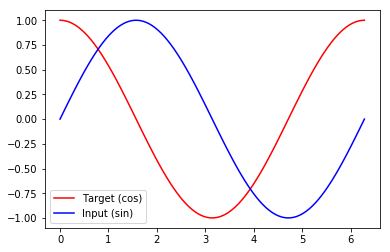

In [18]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='Target (cos)')
plt.plot(steps, x_np, 'b-', label='Input (sin)')
plt.legend(loc='best')
plt.show()

In [19]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(input_size=input_size,
                        hidden_size=32,
                        num_layers=1, #number of rnn layers
                        batch_first=True) #input/output batch size - 1 dimension
        
        self.out = nn.Linear(32,1)
        
    def forward(self, x, h_state):
        # x(batch, time_step, input_size), h_state( n_layers, batch, hidden_size)
        # r_out (batch, time_Step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)
        
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs,dim=1), h_state

In [20]:
rnn = RNN()
print rnn

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [25]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_function = nn.MSELoss()

In [22]:
h_state = None #for inintial hidden state

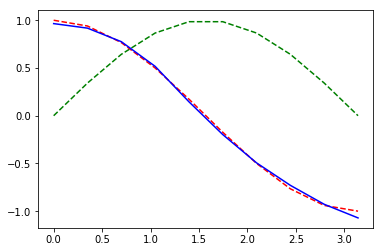

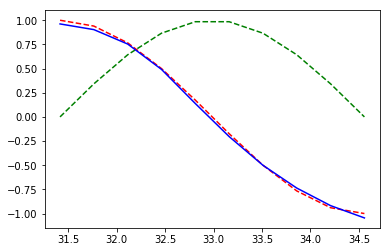

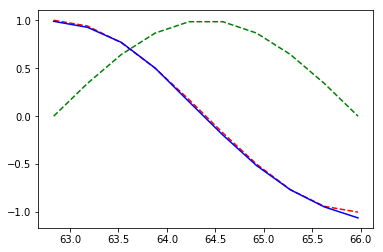

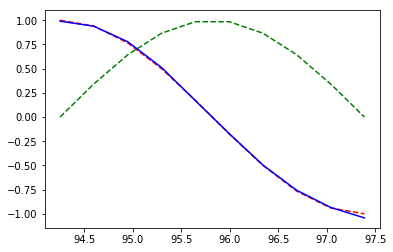

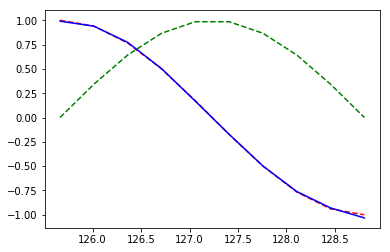

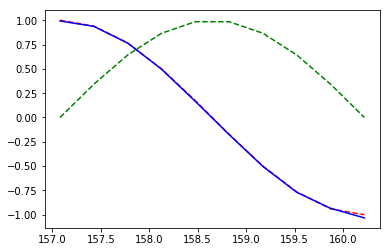

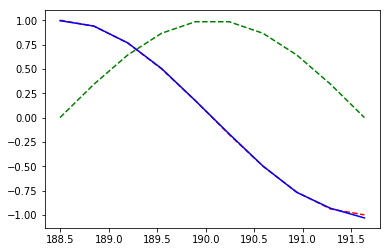

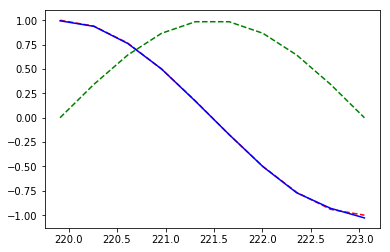

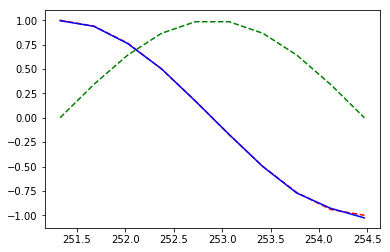

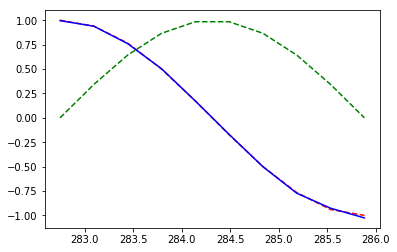

In [39]:
# Training
# Using the sin curve to predict cos curve
for step in range(100):
    start, end = step * np.pi, (step+1)*np.pi # pi-2pi, 2pi-3pi...
    steps = np.linspace(start,end,time_step,dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = torch.from_numpy(x_np[np.newaxis,:,np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis,:,np.newaxis])
    prediction, h_state = rnn(x, h_state)
    
    h_state = h_state.data #updating the hidden state for the next epoch
    
    loss = loss_function(prediction,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

    if step % 10 == 0:
        plt.plot(steps, x_np.flatten(),'g--') # why flatten???????
        plt.plot(steps, y_np.flatten(),'r--')
        plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
        plt.draw()
        plt.show()
        